C:\Users\fjn197\AppData\Local\Temp\ipykernel_28540\1983033185.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 0.5, transform=ax.transData._b, color="white", edgecolor='grey')


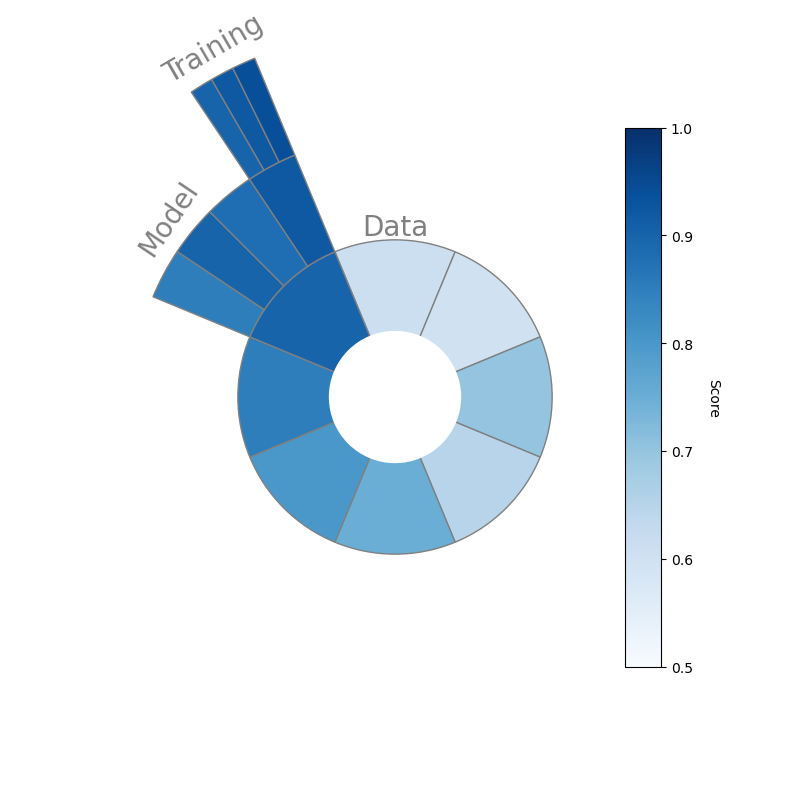

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

data_scores = np.array([0.61, 0.6, 0.7, 0.65, 0.75, 0.8, 0.85, 0.9])
best_data_index = np.argmax(data_scores)

model_scores = np.array([0.85, 0.9, 0.88, 0.92])
best_model_index = np.argmax(model_scores)
training_scores = np.array([0.9, 0.92, 0.94])
norm = Normalize(vmin=0.5, vmax=1.0)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

width_data = np.pi / 4
angles_data = np.linspace(0, 2 * np.pi, len(data_scores), endpoint=False).tolist()
bars_data = ax.bar(angles_data, [1.2]*len(data_scores), width=width_data, bottom=0, color=plt.cm.Blues(norm(data_scores)), edgecolor='grey')

width_model = width_data / 4
start_angle = angles_data[best_data_index] - np.pi/8 + width_model/2
angles_model = [start_angle + i * width_model for i in range(len(model_scores))]

bars_model = ax.bar(angles_model, [.8]*4, width=width_model, bottom=1.2, color=plt.cm.Blues(norm(model_scores)), edgecolor='grey')

width_training = width_model / 3
start_angle_training = angles_model[best_model_index] - width_model/2 + width_training/2
angles_training = [start_angle_training + i * width_training for i in range(len(training_scores))]

bars_training = ax.bar(angles_training, [.8]*len(training_scores), width=width_training, bottom=2., color=plt.cm.Blues(norm(training_scores)), edgecolor='grey')

# Colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=-.2, aspect=15, shrink=.7)
cbar.set_label('Score', rotation=270, labelpad=20)
#cbar.ax.set_yticklabels(['Low', '', '', '', '', 'High'])  # adjust labels if needed

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)  # Remove outer circle
ax.annotate('Data', xy=(0, 0), xytext=(0, 1.3), ha='center', va='center', color='grey', fontsize=20)
ax.annotate('Model', xy=(0, 0), xytext=(-.9, 2.2), ha='center', va='center', color='grey', fontsize=20, rotation=56)
ax.annotate('Training', xy=(0, 0), xytext=(-.48, 3.), ha='center', va='center', color='grey', fontsize=20, rotation=30)
circle = plt.Circle((0, 0), 0.5, transform=ax.transData._b, color="white", edgecolor='grey')
ax.add_artist(circle)
plt.show()

In [45]:
lines = [
    [(0, 3), (-1, 2)],   # Root to left child
    [(0, 3), (1, 2)],    # Root to right child
    
    [(-1, 2), (-1.5, 1)], # Left child of root to its left child
    [(-1, 2), (-0.5, 1)], # Left child of root to its right child
    
    [(1, 2), (0.5, 1)],   # Right child of root to its left child
    [(1, 2), (1.5, 1)],   # Right child of root to its right child
    
    # For the third layer:
    
    [(-1.5, 1), (-1.75, 0)], # Left child of the left child of root to its left child
    [(-1.5, 1), (-1.25, 0)], # Left child of the left child of root to its right child
    
    [(-0.5, 1), (-0.75, 0)], # Right child of the left child of root to its left child
    [(-0.5, 1), (-0.25, 0)], # Right child of the left child of root to its right child
    
    [(0.5, 1), (0.25, 0)],   # Left child of the right child of root to its left child
    [(0.5, 1), (0.75, 0)],   # Left child of the right child of root to its right child
    
    [(1.5, 1), (1.25, 0)],   # Right child of the right child of root to its left child
    [(1.5, 1), (1.75, 0)]    # Right child of the right child of root to its right child
]


In [50]:
import plotly.graph_objects as go


def plot_binary_tree(node_colors, node_sizes):
    if len(node_colors) != 15 or len(node_sizes) != 15:
        print("Please provide the color and size for all 15 nodes!")
        return

    # Define node positions
    x = [0, -1, 1, -1.5, -0.5, 0.5, 1.5, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75]
    y = [3, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

    # Create node traces
    nodes_trace = go.Scatter(
        x=x,
        y=y,
        mode="markers+text",
        marker=dict(size=node_sizes, color=node_colors),
        text=[str(i) for i in range(1, 16)],  # Label nodes 1-15
        textposition="top center"
    )

    
    fig = go.Figure(nodes_trace)
    # Define lines connecting the nodes
    for idx, (start, end) in enumerate(lines, 1):
        x_values = [start[0], end[0], None]
        y_values = [start[1], end[1], None]
        line_trace = go.Scatter(
            x=x_values,
            y=y_values,
            mode="lines",
            line=dict(color="gray"),
        )
        fig.add_trace(line_trace)

    fig.add_trace(nodes_trace)
    # Adjust layout settings to remove background and axes
    fig.update_layout(
        plot_bgcolor="rgba(0, 0, 0, 0)", # Transparent background
        paper_bgcolor="rgba(0, 0, 0, 0)", # Transparent surrounding area
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    )

    fig.show()

# Example usage:
scores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
sizes = 15*[30]

plot_binary_tree(colors, sizes)
